El conjunto de datos ya forma parte de la biblioteca Scikit-Learn, sólo tenemos que importarlo y cargarlo como un marco de datos:

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U scikit-learn

  Using cached scikit_learn-1.3.0-cp39-cp39-win_amd64.whl (9.3 MB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'c:\\programdata\\anaconda3\\lib\\site-packages\\joblib-1.1.0.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.



In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [34]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn import datasets
import seaborn as sns

iris = sns.load_dataset("iris")
iris.sample(5, random_state = 0)

,sepal_length,sepal_width,petal_length,petal_width,species
114,5.8,2.8,5.1,2.4,virginica
62,6.0,2.2,4.0,1.0,versicolor
33,5.5,4.2,1.4,0.2,setosa
107,7.3,2.9,6.3,1.8,virginica
7,5.0,3.4,1.5,0.2,setosa


In [35]:
iris.head

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [36]:
iris.drop('species', axis=1, inplace=True)

In [37]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


El conjunto de datos consta de nueve atributos:

- MedInc - renta mediana en un grupo de bloques
- HouseAge - edad media de la vivienda en un grupo de bloques
- AveRooms - número medio de habitaciones (proporcionadas por hogar)
- AveBedrms - número medio de dormitorios (por hogar)
- Population - población del grupo de bloques
- AveOccup - número medio de miembros del hogar
- Latitud - latitud del grupo de bloques
- Longitud - longitud del grupo de bloques
- MedHouseVal - valor medio de la vivienda en los distritos de California (cientos de miles de dólares)

 En esta tarea, en lugar de predecir un valor continuo, queremos predecir la clase a la que pertenecen estos grupos de bloques. Para ello, podemos dividir la mediana del valor de la vivienda de los distritos en grupos con distintos rangos o intervalos de valores de la vivienda. Cuando se desea utilizar un valor continuo para la clasificación, normalmente se pueden agrupar los datos. De este modo, puedes predecir grupos, en lugar de valores

In [38]:
# Vamos a crear los bins de datos para transformar nuestros valores continuos en categorías:
iris["sepal_width_S"] = pd.qcut(iris["sepal_width"], 5, retbins=False, labels=[1, 2, 3, 4, 5])
iris["sepal_width_S"]


0      5
1      2
2      4
3      3
4      5
      ..
145    2
146    1
147    2
148    4
149    2
Name: sepal_width_S, Length: 150, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [39]:
# A continuación, podemos dividir nuestro conjunto de datos en sus atributos y etiquetas:
y = iris['sepal_width_S']
X = iris.drop(['sepal_width', 'sepal_width_S'], axis = 1)

Como hemos utilizado la columna MedHouseVal para crear bins, tenemos que eliminar las columnas MedHouseVal y MedHouseValCat de X. De esta forma, el DataFrame contendrá las 8 primeras columnas del conjunto de datos (es decir, atributos, características) mientras que nuestra y contendrá sólo la etiqueta asignada MedHouseValCat.

#### Dividir los datos en conjuntos de entrenamiento y de prueba

Utilizaremos de nuevo el valor estándar de Scikit-Learn de 75% de datos de entrenamiento y 25% de datos de prueba. Esto significa que tendremos el mismo número de registros de entrenamiento y de prueba que en la regresión anterior.

In [40]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   sepal_length   150 non-null    float64 
 1   sepal_width    150 non-null    float64 
 2   petal_length   150 non-null    float64 
 3   petal_width    150 non-null    float64 
 4   sepal_width_S  150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.2 KB


In [41]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

Dado que estamos tratando con el mismo conjunto de datos sin procesar y sus diferentes unidades de medida, realizaremos de nuevo el escalado de características.

In [42]:
# Escalado de características para la clasificación
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
X_train

array([[-1.01827123, -1.39338902, -1.3621769 ],
       [-0.7730102 , -1.33550342, -1.49647603],
       [-0.03722712,  0.74837808,  0.92090833],
       [ 0.20803391,  0.4010645 ,  0.51801093],
       [ 1.06644751,  0.51683569,  0.3837118 ],
       [-0.52774918, -1.45127462, -1.09357864],
       [-0.52774918, -1.33550342, -1.3621769 ],
       [-0.40511866, -0.06202028, -0.28778385],
       [ 0.57592545,  0.74837808,  0.3837118 ],
       [ 0.69855596,  0.97992047,  0.7866092 ],
       [ 0.94381699,  0.3431789 ,  0.24941267],
       [ 1.67960008,  1.32723405,  1.72670311],
       [-0.15985763,  0.2274077 ,  0.11511354],
       [ 2.17012213,  1.61666204,  1.18950659],
       [-0.28248815,  0.4010645 ,  0.3837118 ],
       [-0.89564072, -1.39338902, -1.3621769 ],
       [ 2.29275265,  1.67454764,  1.05520746],
       [-0.03722712,  0.16952211, -0.28778385],
       [-0.7730102 , -1.39338902, -1.3621769 ],
       [-1.01827123, -1.45127462, -1.22787777],
       [-0.89564072, -1.10396103, -1.093


### Entrenamiento y predicción para la clasificación

Después de agrupar, dividir y escalar los datos, podemos aplicarles un clasificador. Para la predicción, utilizaremos de nuevo 5 vecinos como línea de base. También puede instanciar la clase KNeighbors_ sin ningún argumento y automáticamente utilizará 5 vecinos. Aquí, en lugar de importar el KNeighborsRegressor, importaremos el KNeighborsClassifier, clase

In [44]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:
# Tras ajustar el KNeighborsClassifier, podemos predecir las clases de los datos de prueba:
y_pred = classifier.predict(X_test)

#### Evaluando KNN para la clasificación


Para evaluar el clasificador KNN, también podemos utilizar el método de puntuación, pero ejecuta una métrica diferente ya que estamos puntuando un clasificador y no un regresor. La métrica básica para la clasificación es la precisión, que describe cuántas predicciones acertó nuestro clasificador. El valor de precisión más bajo es 0 y el más alto es 1. Normalmente multiplicamos ese valor por 100 para obtener un porcentaje.

$$accuracy=\frac{number of correct predictions
}{total number of predictions
}

In [46]:
acc =  classifier.score(X_test, y_test)
print(acc) # 0.6191860465116279

0.42105263157894735


Observando la puntuación resultante, podemos deducir que nuestro clasificador acertó en ~62% de las clases. Esto ya ayuda en el análisis, aunque al saber solo lo que el clasificador acertó, es difícil mejorarlo.

Tanto un fallo sistémico de alguna clase como un fallo compartido entre clases pueden arrojar una puntuación de precisión del 62%. La precisión no es una buena métrica para la evaluación real, pero sirve como una buena aproximación. En la mayoría de los casos, con conjuntos de datos equilibrados, una precisión del 62% está relativamente repartida. Además, en la mayoría de los casos, los conjuntos de datos no están equilibrados, por lo que volvemos a la casilla de salida, ya que la precisión es una métrica insuficiente.

Podemos profundizar en los resultados utilizando otras métricas para poder determinarlo. Este paso también es diferente de la regresión, aquí vamos a utilizar:

1. **Matriz de la confusión**: Para saber cuánto acertamos o nos equivocamos en cada clase. Los valores que fueron correctos y se predijeron correctamente se denominan verdaderos positivos los que se predijeron como positivos pero no lo fueron se denominan falsos positivos. La misma nomenclatura de verdaderos negativos y falsos negativos se utiliza para los valores negativos;
2. **Precisión**: Para saber qué valores de predicción fueron considerados correctos por nuestro clasificador. La precisión dividirá esos valores de verdaderos positivos entre todo lo que se predijo como positivo; 
$$precision=\frac{truepositive}{true positive + false positive}


3. **Recall**: para saber cuántos de los verdaderos positivos fueron identificados por nuestro clasificador. La recuperación se calcula dividiendo los verdaderos positivos por todo lo que debería haberse predicho como positivo.
$$Recall=\frac{truepositive}{true positive + false negative}.

**F1 Score**: Es la media equilibrada o armónica de precisión y recall. El valor más bajo es 0 y el más alto es 1. Cuando la puntuación f1 es igual a 1, significa que todas las clases se predijeron correctamente; se trata de una puntuación muy difícil de obtener con datos reales (casi siempre hay excepciones).
$$f1-score=\frac{precisioin * recall}{precisioin + recall}

Los métodos confusion_matrix() y classification_report() del módulo sklearn.metrics pueden utilizarse para calcular y mostrar todas estas métricas. La matriz de confusión se visualiza mejor utilizando un mapa de calor. El informe de clasificación ya nos proporciona exactitud, precisión, recall y f1-score, pero también puedes importar cada una de estas métricas desde sklearn.metrics.

Para obtener las métricas, ejecute el siguiente fragmento:

              precision    recall  f1-score   support

           1       0.50      0.33      0.40         6
           2       0.33      0.42      0.37        12
           3       0.50      0.25      0.33         4
           4       0.30      0.33      0.32         9
           5       0.71      0.71      0.71         7

    accuracy                           0.42        38
   macro avg       0.47      0.41      0.43        38
weighted avg       0.44      0.42      0.42        38



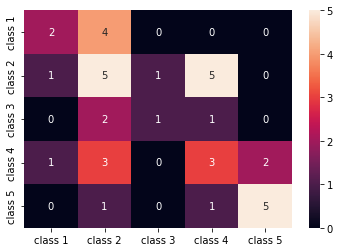

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap 
import seaborn as sns

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3', 'class 4','class 5']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

Los resultados muestran que KNN fue capaz de clasificar los 5160 registros del conjunto de prueba con una precisión del 62%, por encima de la media. Los apoyos son bastante iguales (distribución uniforme de las clases en el conjunto de datos), por lo que la F1 ponderada y la F1 no ponderada van a ser aproximadamente iguales. También podemos ver el resultado de las métricas para cada una de las 4 clases. A partir de ahí, podemos observar que la clase 2 tiene la precisión, la recuperación y la puntuación f1 más bajas. La clase 3 está justo detrás de la clase 2 por tener las puntuaciones más bajas, y luego, tenemos la clase 1 con las mejores puntuaciones seguida de la clase 4.

Observando la matriz de confusión, podemos ver que

- la clase 1 se confundió mayoritariamente con la clase 2 en 238 casos
- la clase 2 por la clase 1 en 256 entradas, y por la clase 3 en 260 casos
- la clase 3 se confundió mayoritariamente con la clase 2, en 374 entradas, y con la clase 4, en 193 casos
- la clase 4 se clasificó erróneamente como clase 3 en 339 entradas, y como clase 2 en 130 casos.

Obsérvese también que la diagonal muestra los valores positivos verdaderos; al observarla, es evidente que las clases 2 y 3 tienen los valores predichos menos correctos.

Con esos resultados, podríamos profundizar en el análisis inspeccionándolos más a fondo para averiguar por qué ha sucedido eso, y también entender si 4 clases son la mejor manera de agrupar los datos. Tal vez los valores de las clases 2 y 3 estaban demasiado próximos entre sí, por lo que resultaba difícil distinguirlos. Además del número arbitrario de bins de datos, también hay otro número arbitrario que hemos elegido, el número de K vecinos.

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.inspection import decision_function
from sklearn.neighbors import NearestCentroid

# Suponiendo que x es un dataframe de pandas
x_2d = iris[["sepal_length", "petal_length","sepal_width","petal_width"]].to_numpy()
y = iris["sepal_width_S"]

# Ahora x_2d será un arreglo numpy bidimensional con las dos variables seleccionadas
print(x_2d)

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ListedColormap(["darkorange", "c", "darkblue"])

for shrinkage in [None, 0.2]:  # Utiliza 'None' en lugar de 'none'
    # Creamos una instancia del clasificador NearestCentroid y ajustamos los datos.
    clf = NearestCentroid(shrink_threshold=shrinkage)
    clf.fit(x_2d, y)
    y_pred = clf.predict(x_2d)
    print(shrinkage, np.mean(y == y_pred))

    _, ax = plt.subplots()
    decision_function.decision_boundary_display(
        clf, x_2d, cmap=cmap_light, ax=ax, response_method="predict"
    )

    # También graficamos los puntos de entrenamiento
    plt.scatter(
        x_2d[:, 0], x_2d[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=10
    )
    plt.title("Clasificación de 3 clases (shrink_threshold=%r)" % shrinkage)
    plt.axis("tight")
    plt.show()



ImportError: cannot import name 'decision_function' from 'sklearn.inspection' (c:\ProgramData\Anaconda3\lib\site-packages\sklearn\inspection\__init__.py)

#### Finding the Best K for KNN Classification

Repitamos lo que se ha hecho para la regresión y tracemos el gráfico de los valores de K y la métrica correspondiente para el conjunto de prueba. También puede elegir la métrica que mejor se adapte a su contexto; en este caso, elegiremos la puntuación f1.

De este modo, trazaremos la puntuación f1 para los valores predichos del conjunto de prueba para todos los valores de K comprendidos entre 1 y 40.

En primer lugar, importamos f1_score de sklearn.metrics y, a continuación, calculamos su valor para todas las predicciones de un clasificador K-Nearest Neighbors, donde K oscila entre 1 y 40:

In [ ]:
from sklearn.metrics import f1_score

f1s = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 4 classes 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

El siguiente paso consiste en representar gráficamente los valores de f1_score frente a los valores de K. La diferencia con la regresión es que en lugar de elegir el valor K que minimiza el error, esta vez elegiremos el valor que maximiza la puntuación f1.

Ejecute el siguiente script para crear el gráfico:

In [ ]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

A partir de la salida, podemos ver que la puntuación f1 es la más alta cuando el valor de K es 15. Vamos a volver a entrenar nuestro clasificador con 15 vecinos y ver lo que hace a nuestros resultados del informe de clasificación:

In [ ]:
classifier15 = KNeighborsClassifier(n_neighbors=15)
classifier15.fit(X_train, y_train)
y_pred15 = classifier15.predict(X_test)
print(classification_report(y_test, y_pred15))

Observe que nuestras métricas han mejorado con 15 vecinos, tenemos un 63% de exactitud y mayores puntuaciones de precisión, recuperación y f1, pero aún tenemos que examinar más a fondo los bloques para intentar entender por qué la puntuación f1 de las clases 2 y 3 sigue siendo baja.

Además de utilizar KNN para la regresión y determinar los valores de los bloques y para la clasificación, para determinar las clases de los bloques, también podemos utilizar KNN para detectar qué valores medios de los bloques son diferentes de la mayoría, los que no siguen lo que hace la mayoría de los datos. En otras palabras, podemos utilizar KNN para detectar valores atípicos.

### Implementando KNN para detección de datos atipicos con Scikit-Learn


La detección de valores atípicos utiliza otro método que difiere de lo que habíamos hecho anteriormente para la regresión y la clasificación.

Aquí veremos a qué distancia se encuentra cada uno de los vecinos de un punto de datos. Utilizaremos los 5 vecinos por defecto. Para un punto de datos, calcularemos la distancia a cada uno de los K vecinos más cercanos. Para ello, importaremos otro algoritmo KNN de Scikit-learn que no es específico ni para regresión ni para clasificación llamado simplemente NearestNeighbors.

Después de la importación, instanciaremos una clase NearestNeighbors con 5 vecinos - también se puede instanciar con 12 vecinos para identificar valores atípicos en nuestro ejemplo de regresión o con 15, para hacer lo mismo para el ejemplo de clasificación. A continuación, ajustaremos nuestros datos de entrenamiento y utilizaremos el método kneighbors() para encontrar nuestras distancias calculadas para cada punto de datos e índices de vecinos:

In [ ]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors = 5)
nbrs.fit(X_train)
# Distances and indexes of the 5 neighbors 
distances, indexes = nbrs.kneighbors(X_train)

Ahora tenemos 5 distancias para cada punto de datos: la distancia entre él y sus 5 vecinos, y un índice que los identifica. Echemos un vistazo a los tres primeros resultados y a la forma del array para visualizarlo mejor.

Para ver la forma de las tres primeras distancias, ejecuta:

In [ ]:
distances[:3], distances.shape

Observe que hay 3 filas con 5 distancias cada una. También podemos mirar y los índices de los vecinos:

In [ ]:
indexes[:3], indexes[:3].shape


En la salida anterior, podemos ver los índices de cada uno de los 5 vecinos. Ahora, podemos seguir calculando la media de las 5 distancias y trazar un gráfico que cuente cada fila en el eje X y muestre cada distancia media en el eje Y:

In [ ]:
dist_means = distances.mean(axis=1)
plt.plot(dist_means)
plt.title('Mean of the 5 neighbors distances for each data point')
plt.xlabel('Count')
plt.ylabel('Mean Distances')

Observe que hay una parte del gráfico en la que las distancias medias tienen valores uniformes. Ese punto del eje Y en el que las medias no son ni demasiado altas ni demasiado bajas es exactamente el punto que necesitamos identificar para cortar los valores atípicos.

En este caso, es donde la distancia media es 3. Vamos a trazar de nuevo el gráfico con una línea de puntos horizontal para poder identificarlo:

In [ ]:
dist_means = distances.mean(axis=1)
plt.plot(dist_means)
plt.title('Mean of the 5 neighbors distances for each data point with cut-off line')
plt.xlabel('Count')
plt.ylabel('Mean Distances')
plt.axhline(y = 3, color = 'r', linestyle = '--')

Esta línea marca la distancia media por encima de la cual varían todos los valores. Esto significa que todos los puntos con una distancia media superior a 3 son nuestros valores atípicos. Podemos averiguar los índices de esos puntos utilizando np.where(). Este método dará como resultado Verdadero o Falso para cada índice con respecto a la condición de media superior a 3:

In [ ]:
import numpy as np

# Visually determine cutoff values > 3
outlier_index = np.where(dist_means > 3)
outlier_index


Ahora tenemos nuestros índices de puntos atípicos. Vamos a localizarlos en el marco de datos:

In [ ]:
# Filter outlier values
outlier_values = df.iloc[outlier_index]
outlier_values

Así es como detectamos cada punto de datos que se desvía de la tendencia general de los datos. Podemos ver que hay 16 puntos en los datos de entrenamiento que deberían examinarse más a fondo, investigarse, tal vez tratarse o incluso eliminarse de nuestros datos (si se introdujeron erróneamente) para mejorar los resultados. Estos puntos pueden deberse a errores tipográficos, a incoherencias en los valores medios de los bloques, o incluso a ambas cosas.